In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [5]:
df =  pd.read_csv('C:\\Users\\abish\\Downloads\\SofifaAll\\FIFA22_official_data_updated.csv')

In [6]:
df

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,new_values,new_values_series,new_wages_series
0,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179,69,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,107.5M,107500000.0,250000.0
1,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189,82,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,93M,93000000.0,140000.0
2,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182,83,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,44.5M,44500000.0,135000.0
3,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181,70,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,125.5M,125500000.0,350000.0
4,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172,69,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,37M,37000000.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,782,Right,1.0,2.0,1.0,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES",31.0,"Jul 1, 2016",NaN,2019,188,80,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,15.0,21.0,34.0,30.0,31.0,16.0,51.0,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,37.0,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN,100K,100000.0,1000.0
16706,�

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Photo                     16710 non-null  object 
 3   Nationality               16710 non-null  object 
 4   Flag                      16710 non-null  object 
 5   Overall                   16710 non-null  int64  
 6   Potential                 16710 non-null  int64  
 7   Club                      16446 non-null  object 
 8   Club Logo                 16710 non-null  object 
 9   Special                   16710 non-null  int64  
 10  Preferred Foot            16710 non-null  object 
 11  International Reputation  16710 non-null  float64
 12  Weak Foot                 16710 non-null  float64
 13  Skill Moves               16710 non-null  float64
 14  Work R

In [8]:
df = pd.get_dummies(df,columns=['Preferred Foot'],drop_first=True)
df.rename(columns={'new_values_series': 'Transfer Cost'}, inplace=True)

In [9]:
df.drop(['Real Face','Flag', 'Release Clause','Crossing','Volleys','Agility','Reactions','Balance','Jumping','Stamina','Aggression','Interceptions','Penalties','Composure','Marking'
         ,'Positioning','Vision','Strength','Jersey Number','Club','Club Logo','Body Type','Joined','Loaned From','GKHandling',	'GKKicking',	'GKPositioning',	'GKReflexes',	'Best Position' ,'Skill Moves','GKDiving'
        
        
        
        
        
        
        
        ],axis=1,inplace=True)

In [9]:
#'Dribbling','Curve','Acceleration'

In [10]:

#looking correlations
corr_matrix = df.corr()
corr_matrix



,Age,Overall,Potential,Special,International Reputation,Weak Foot,Height,Weight,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,ShotPower,LongShots,StandingTackle,SlidingTackle,Best Overall Rating,DefensiveAwareness,new_values_series,new_wages_series,Preferred Foot_Right
Age,1.000000,0.473963,-0.291925,0.251852,0.359957,0.076093,0.097468,0.263252,0.085817,0.171271,0.150744,0.008679,0.166627,0.213594,0.204621,0.088814,-0.237159,-0.230065,0.294943,0.172365,0.096033,0.080387,0.399066,0.158146,0.017592,0.170613,0.019458
Overall,0.473963,1.000000,0.586648,0.576851,0.511914,0.190012,0.031213,0.142155,0.287630,0.301434,0.483895,0.328883,0.369446,0.338062,0.474325,0.413273,0.117279,0.126716,0.513840,0.361913,0.231631,0.205826,0.985377,0.284514,0.559235,0.615731,-0.020229
Potential,-0.291925,0.586648,1.000000,0.290843,0.335564,0.124341,-0.024681,-0.060267,0.160098,0.122842,0.308806,0.248354,0.179994,0.129219,0.269037,0.278631,0.195941,0.193727,0.231442,0.160376,0.123196,0.113628,0.633093,0.119204,0.534564,0.484975,-0.021775
Special,0.251852,0.576851,0.290843,1.000000,0.278249,0.315141,-0.386278,-0.270770,0.719047,0.613581,0.900542,0.864322,0.845994,0.781589,0.841629,0.896694,0.581925,0.563291,0.692078,0.826613,0.528911,0.492826,0.603120,0.557387,0.332026,0.368994,-0.095550
International Reputation,0.359957,0.511914,0.335564,0.278249,1.000000,0.135435,0.043627,0.112572,0.167000,0.175141,0.257356,0.162838,0.232803,0.226434,0.256567,0.219244,-0.033598,-0.035328,0.292788,0.205991,0.090382,0.076087,0.493995,0.117859,0.498621,0.587727,0.007831
Weak Foot,0.076093,0.190012,0.124341,0.315141,0.135435,1.000000,-0.163004,-0.120117,0.356359,0.159007,0.299309,0.330162,0.326118,0.315292,0.257089,0.329749,0.221177,0.208197,0.305979,0.350608,-0.002632,-0.023521,0.202291,0.020762,0.132747,0.139363,0.115004
Height,0.097468,0.031213,-0.024681,-0.386278,0.043627,-0.163004,1.000000,0.763135,-0.373993,0.057073,-0.349497,-0.492373,-0.461725,-0.419372,-0.314953,-0.414056,-0.558332,-0.453700,-0.187219,-0.392078,-0.060815,-0.062364,0.018564,-0.060050,0.001694,0.021006,0.068381
Weight,0.263252,0.142155,-0.060267,-0.270770,0.112572,-0.120117,0.763135,1.000000,-0.288438,0.080847,-0.275285,-0.414253,-0.363447,-0.316878,-0.244743,-0.336615,-0.506261,-0.413639,-0.065047,-0.284454,-0.057312,-0.061787,0.117665,-0.043721,0.021469,0.061344,0.077690
Finishing,0.085817,0.287630,0.160098,0.719047,0.167000,0.356359,-0.373993,-0.288438,1.000000,0.449498,0.662264,0.824958,0.771480,0.701233,0.496259,0.787214,0.570810,0.543235,0.736500,0.890298,-0.047524,-0.092029,0.321660,-0.011597,0.199846,0.207571,-0.012292
HeadingAccuracy,0.171271,0.301434,0.122842,0.613581,0.175141,0.159007,0.057073,0.080847,0.449498,1.000000,0.646350,0.540134,0.413299,0.364870,0.502275,0.652040,0.239181,0.304222,0.365833,0.473898,0.527570,0.501121,0.330133,0.551826,0.141279,0.193451,-0.017624


Text(0.5, 1.0, 'Correlation Heatmap')

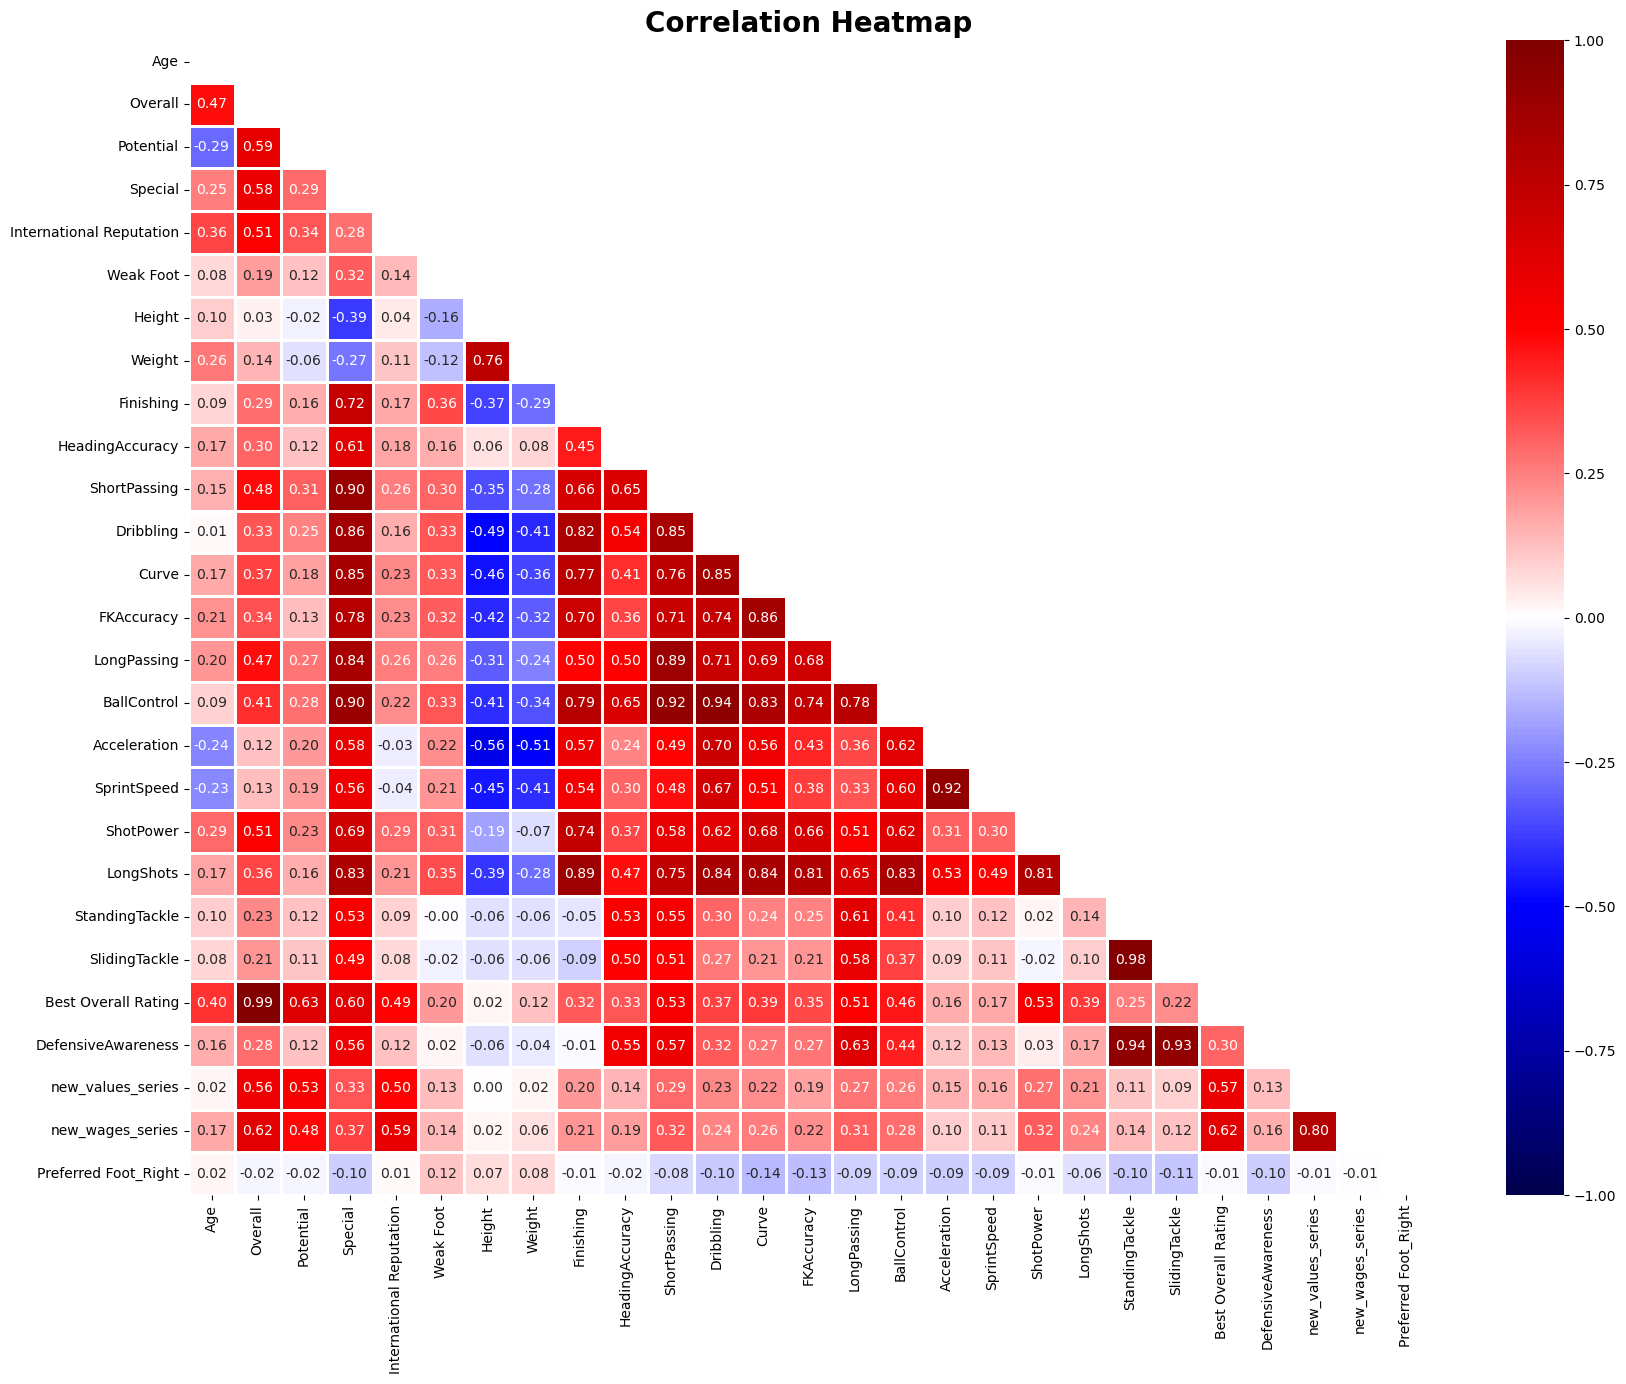

In [11]:
fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

In [12]:
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Height,Weight,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,ShotPower,LongShots,StandingTackle,SlidingTackle,Best Overall Rating,DefensiveAwareness,new_values_series,new_wages_series,Preferred Foot_Right
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,15818.000000,1.671000e+04,16710.000000,16710.000000
mean,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,181.430521,75.288270,48.725075,54.123339,61.314423,58.591203,50.574522,45.074087,55.454877,61.387433,65.684919,65.783124,60.642190,49.989228,49.155536,46.830564,68.565410,48.019408,3.347236e+06,11338.925793,0.754817
std,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,6.869825,7.162614,19.401715,17.007831,13.665353,17.925005,18.237536,17.596471,14.494716,15.673348,15.005583,14.737924,12.959795,19.082943,21.454857,21.175431,6.256253,20.181354,8.123399e+06,21309.539618,0.430208
min,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,155.000000,49.000000,3.000000,5.000000,8.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,12.000000,4.000000,3.000000,6.000000,36.000000,3.000000,0.000000e+00,0.000000,0.000000
25%,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,176.250000,70.000000,34.000000,46.000000,57.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,52.000000,37.000000,29.000000,26.000000,65.000000,30.000000,6.000000e+05,2000.000000,1.000000
50%,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,182.000000,75.000000,53.000000,57.000000,64.000000,63.500000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,62.000000,55.000000,57.000000,54.000000,68.000000,54.000000,1.200000e+06,4000.000000,1.000000
75%,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,186.000000,80.000000,64.000000,66.000000,70.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,70.000000,65.000000,67.000000,65.000000,73.000000,65.000000,2.500000e+06,12000.000000,1.000000
max,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,206.000000,110.000000,95.000000,93.000000,94.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,95.000000,94.000000,93.000000,95.000000,93.000000,93.000000,1.940000e+08,350000.000000,1.000000


In [13]:
df = df.drop(['Height','Weight','Preferred Foot_Right'],axis=1)

In [14]:
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,ShotPower,LongShots,StandingTackle,SlidingTackle,Best Overall Rating,DefensiveAwareness,new_values_series,new_wages_series
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,15818.000000,1.671000e+04,16710.000000
mean,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,48.725075,54.123339,61.314423,58.591203,50.574522,45.074087,55.454877,61.387433,65.684919,65.783124,60.642190,49.989228,49.155536,46.830564,68.565410,48.019408,3.347236e+06,11338.925793
std,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,19.401715,17.007831,13.665353,17.925005,18.237536,17.596471,14.494716,15.673348,15.005583,14.737924,12.959795,19.082943,21.454857,21.175431,6.256253,20.181354,8.123399e+06,21309.539618
min,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,3.000000,5.000000,8.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,12.000000,4.000000,3.000000,6.000000,36.000000,3.000000,0.000000e+00,0.000000
25%,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,34.000000,46.000000,57.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,52.000000,37.000000,29.000000,26.000000,65.000000,30.000000,6.000000e+05,2000.000000
50%,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,53.000000,57.000000,64.000000,63.500000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,62.000000,55.000000,57.000000,54.000000,68.000000,54.000000,1.200000e+06,4000.000000
75%,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,64.000000,66.000000,70.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,70.000000,65.000000,67.000000,65.000000,73.000000,65.000000,2.500000e+06,12000.000000
max,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,95.000000,93.000000,94.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,95.000000,94.000000,93.000000,95.000000,93.000000,93.000000,1.940000e+08,350000.000000


In [15]:
df = df[df['Transfer Cost']!=0]

In [16]:
df.sort_values(by='Transfer Cost')

,Name,Age,Photo,Nationality,Overall,Potential,Special,International Reputation,Weak Foot,Work Rate,Position,Contract Valid Until,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,ShotPower,LongShots,StandingTackle,SlidingTackle,Best Overall Rating,DefensiveAwareness,new_values,new_values_series,new_wages_series
3009,14 J. Zanetti,39,https://cdn.sofifa.com/players/001/041/14_60.png,Argentina,75,75,1874,3.0,4.0,Medium/ High,"<span class=""pos pos28"">SUB",2014,40.0,46.0,84.0,80.0,60.0,50.0,76.0,85.0,55.0,69.0,71.0,30.0,75.0,69.0,75.0,NaN,1K,1000.0,45000.0
1770,14 R. Giggs,39,https://cdn.sofifa.com/players/000/241/14_60.png,Wales,78,78,1939,3.0,2.0,Medium/ Medium,"<span class=""pos pos29"">RES",2014,70.0,60.0,85.0,77.0,87.0,78.0,81.0,79.0,59.0,60.0,71.0,71.0,43.0,51.0,78.0,NaN,1K,1000.0,60000.0
3882,13 E. Davids,39,https://cdn.sofifa.com/players/005/672/13_60.png,Netherlands,64,64,1837,1.0,3.0,Medium/ High,"<span class=""pos pos14"">CM",2014,57.0,39.0,71.0,55.0,70.0,65.0,63.0,69.0,59.0,46.0,84.0,61.0,73.0,73.0,69.0,NaN,1K,1000.0,0.0
15027,19 B. Barry-Murphy,39,https://cdn.sofifa.com/players/100/557/19_60.png,Republic of Ireland,49,49,1309,1.0,3.0,Low/ Low,"<span class=""pos pos29"">RES",2022,28.0,25.0,55.0,37.0,62.0,59.0,57.0,57.0,31.0,34.0,55.0,31.0,49.0,40.0,51.0,NaN,7K,7000.0,1000.0
16184,19 S. Shearer,37,https://cdn.sofifa.com/players/120/415/19_60.png,Scotland,59,59,1039,1.0,3.0,Medium/ Medium,"<span class=""pos pos28"">SUB",2019,14.0,17.0,28.0,12.0,11.0,16.0,25.0,23.0,37.0,38.0,24.0,11.0,11.0,11.0,58.0,NaN,10K,10000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,91,91,2304,4.0,5.0,High/ High,"<span class=""pos pos13"">RCM",2025,82.0,55.0,94.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,91.0,91.0,65.0,53.0,91.0,68.0,125.5M,125500000.0,350000.0
64,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,91,91,2183,5.0,5.0,High/ Medium,"<span class=""pos pos27"">LW",2025,83.0,63.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,80.0,81.0,32.0,29.0,91.0,35.0,129M,129000000.0,270000.0
39,H. Kane,27,https://cdn.sofifa.com/players/202/126/22_60.png,England,90,90,2205,4.0,5.0,High/ High,"<span class=""pos pos25"">ST",2024,94.0,86.0,85.0,83.0,83.0,65.0,86.0,85.0,65.0,74.0,91.0,86.0,36.0,38.0,90.0,50.0,129.5M,129500000.0,240000.0
251,E. Haaland,20,https://cdn.sofifa.com/players/239/085/22_60.png,Norway,88,93,2102,4.0,3.0,High/ High,"<span class=""pos pos24"">RS",2024,94.0,69.0,77.0,78.0,77.0,62.0,51.0,85.0,82.0,94.0,94.0,87.0,43.0,30.0,90.0,44.0,137.5M,137500000.0,110000.0


In [17]:

#looking correlations
corr_matrix = df.corr()
corr_matrix



,Age,Overall,Potential,Special,International Reputation,Weak Foot,Finishing,HeadingAccuracy,ShortPassing,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,ShotPower,LongShots,StandingTackle,SlidingTackle,Best Overall Rating,DefensiveAwareness,new_values_series,new_wages_series
Age,1.000000,0.475607,-0.304627,0.259796,0.348820,0.072802,0.087013,0.170706,0.151614,0.010098,0.166526,0.211436,0.205503,0.088173,-0.231370,-0.223543,0.300393,0.173158,0.098746,0.082599,0.400142,0.160166,0.025836,0.181901
Overall,0.475607,1.000000,0.581152,0.581065,0.514376,0.188168,0.289164,0.301153,0.486809,0.330749,0.371071,0.336873,0.476809,0.414919,0.116078,0.126347,0.516958,0.363318,0.233703,0.207399,0.985367,0.285354,0.571060,0.629122
Potential,-0.304627,0.581152,1.000000,0.291565,0.328470,0.121522,0.159633,0.120437,0.308641,0.248352,0.180122,0.125918,0.268815,0.277835,0.195057,0.192859,0.230238,0.159293,0.124264,0.114819,0.628020,0.119169,0.544019,0.493989
Special,0.259796,0.581065,0.291565,1.000000,0.292241,0.314678,0.721367,0.615900,0.903262,0.866654,0.846325,0.785062,0.844356,0.899779,0.582233,0.563428,0.693823,0.829598,0.530846,0.493178,0.607636,0.557843,0.336427,0.374010
International Reputation,0.348820,0.514376,0.328470,0.292241,1.000000,0.132533,0.168333,0.170734,0.259134,0.165436,0.232262,0.223263,0.257897,0.218115,-0.028367,-0.030140,0.297997,0.206811,0.093097,0.077668,0.496065,0.117700,0.525543,0.618974
Weak Foot,0.072802,0.188168,0.121522,0.314678,0.132533,1.000000,0.352833,0.155344,0.296142,0.327061,0.324529,0.311848,0.255706,0.326070,0.221152,0.208857,0.303037,0.347273,-0.001768,-0.023000,0.200355,0.019792,0.136239,0.143679
Finishing,0.087013,0.289164,0.159633,0.721367,0.168333,0.352833,1.000000,0.449296,0.661888,0.824967,0.771186,0.699841,0.496075,0.787414,0.572332,0.544449,0.736129,0.890326,-0.046204,-0.092476,0.323466,-0.012144,0.203134,0.211552
HeadingAccuracy,0.170706,0.301153,0.120437,0.615900,0.170734,0.155344,0.449296,1.000000,0.645975,0.540774,0.412542,0.362356,0.502434,0.651715,0.238494,0.304390,0.364682,0.473798,0.527235,0.500440,0.330414,0.551807,0.144812,0.197858
ShortPassing,0.151614,0.486809,0.308641,0.903262,0.259134,0.296142,0.661888,0.645975,1.000000,0.847590,0.764470,0.711830,0.891092,0.918312,0.493558,0.475606,0.578129,0.752251,0.546974,0.508202,0.529092,0.572996,0.295922,0.329331
Dribbling,0.010098,0.330749,0.248352,0.866654,0.165436,0.327061,0.824967,0.540774,0.847590,1.000000,0.847179,0.740289,0.711084,0.943079,0.705516,0.673967,0.615029,0.843440,0.301010,0.266298,0.371536,0.324536,0.230562,0.241227


In [18]:
selected_columns = ['Age','SprintSpeed','Dribbling','StandingTackle','SlidingTackle','ShortPassing','LongPassing','ShotPower','LongShots','International Reputation','BallControl','Finishing','Transfer Cost']
new_df = df[selected_columns].copy()



In [19]:
new_df


,Age,SprintSpeed,Dribbling,StandingTackle,SlidingTackle,ShortPassing,LongPassing,ShotPower,LongShots,International Reputation,BallControl,Finishing,new_values_series
0,26,73.0,83.0,73.0,65.0,91.0,88.0,89.0,89.0,3.0,87.0,83.0,107500000.0
1,26,83.0,84.0,85.0,77.0,86.0,84.0,85.0,86.0,4.0,87.0,82.0,93000000.0
2,34,69.0,83.0,45.0,38.0,83.0,77.0,89.0,88.0,5.0,86.0,93.0,44500000.0
3,30,76.0,88.0,65.0,53.0,94.0,93.0,91.0,91.0,4.0,91.0,82.0,125500000.0
4,29,76.0,87.0,84.0,82.0,82.0,78.0,82.0,81.0,2.0,88.0,66.0,37000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,20,25.0,11.0,12.0,10.0,23.0,17.0,42.0,8.0,1.0,14.0,9.0,375000.0
16705,17,21.0,12.0,11.0,12.0,18.0,19.0,16.0,6.0,1.0,10.0,5.0,100000.0
16706,20,22.0,6.0,13.0,12.0,17.0,28.0,40.0,6.0,1.0,17.0,7.0,180000.0
16707,19,17.0,8.0,11.0,9.0,15.0,14.0,34.0,8.0,1.0,12.0,9.0,100000.0


In [22]:
from scipy.stats import zscore

# Calculate Z-scores for the target variable
z_scores = zscore(new_df['Transfer Cost'])

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers using the threshold
outliers = np.abs(z_scores) > threshold

# Display the number of outliers
print("Number of outliers:", outliers.sum())

# Display the indices of the outliers
outlier_indices = np.where(outliers)[0]
print("Outlier indices:", outlier_indices)

# Remove outliers from the DataFrame
new_df_no_outliers = new_df[~outliers]

# Display the shape of the DataFrame after removing outliers
print("Shape of the DataFrame after removing outliers:", new_df_no_outliers.shape)


Number of outliers: 323
Outlier indices: [    0     1     2     3     4     5     6     7     8     9    10    11
    13    14    15    17    18    20    21    22    23    24    25    27
    28    29    30    31    32    33    34    35    36    37    38    40
    41    42    43    44    45    46    49    50    52    53    54    55
    57    58    59    60    61    62    63    64    67    69    70    74
    75    78    79    80    81    82    86    87    88    89    90    94
    95    96    99   102   107   109   113   114   115   116   117   121
   123   124   125   126   127   128   136   145   147   149   151   153
   155   158   160   163   164   166   169   170   171   174   176   178
   180   192   193   195   197   203   204   206   207   211   214   216
   222   223   225   226   228   230   237   247   251   255   257   259
   260   261   263   265   269   270   276   287   288   291   292   293
   296   298   301   302   303   311   313   317   323   332   336   339
   341   3

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = new_df_no_outliers.drop('Transfer Cost', axis=1)
y = new_df_no_outliers['Transfer Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_preds = linear_model.predict(X_train)
linear_test_preds = linear_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, linear_train_preds)
mse_test = mean_squared_error(y_test, linear_test_preds)
r2_train = r2_score(y_train, linear_train_preds)
r2_test = r2_score(y_test, linear_test_preds)

# Print the results
print("Linear Regression:")
print(f'Training Mean Squared Error: {mse_train:.4f}')
print(f'Testing Mean Squared Error: {mse_test:.4f}')
print(f'Training R-squared: {r2_train:.4f}')
print(f'Testing R-squared: {r2_test:.4f}\n')



Linear Regression:
Training Mean Squared Error: 10492127235411.9746
Testing Mean Squared Error: 10922282269902.7480
Training R-squared: 0.2646
Testing R-squared: 0.3068



In [24]:
from scipy.stats import zscore


z_scores = zscore(new_df_no_outliers['Transfer Cost'])


threshold = 3

 
outliers = (np.abs(z_scores) > threshold)

outlier_indices = np.where(outliers)[0]
print("Outlier indices:", outlier_indices)


Outlier indices: [    0     1     2     6     7     8     9    11    12    13    14    15
    19    20    21    23    24    25    27    28    30    31    33    35
    36    38    39    41    42    43    46    47    49    51    52    58
    60    61    62    63    66    69    70    71    72    73    74    78
    79    81    83    84    87    89    90    95    96    97    99   101
   102   106   110   111   112   113   114   115   116   119   122   125
   126   127   128   129   130   131   133   134   137   138   141   143
   146   147   148   149   154   155   160   161   162   175   176   178
   182   184   187   188   190   193   202   211   213   215   217   224
   225   230   231   232   243   244   246   248   252   254   258   259
   261   262   267   269   272   274   279   282   283   284   287   289
   294   296   298   299   300   314   319   320   327   328   329   332
   337   341   351   353   354   355   360   364   366   368   374   377
   379   381   383   389   390   3

In [25]:
new_df_no_outliers

,Age,SprintSpeed,Dribbling,StandingTackle,SlidingTackle,ShortPassing,LongPassing,ShotPower,LongShots,International Reputation,BallControl,Finishing,new_values_series
12,35,69.0,65.0,89.0,91.0,82.0,83.0,79.0,64.0,4.0,83.0,65.0,24000000.0
16,28,84.0,77.0,78.0,76.0,82.0,81.0,87.0,83.0,3.0,80.0,63.0,27500000.0
19,33,89.0,90.0,80.0,83.0,81.0,69.0,84.0,80.0,3.0,85.0,70.0,19000000.0
26,34,65.0,76.0,84.0,83.0,81.0,79.0,84.0,81.0,4.0,83.0,75.0,12000000.0
40,35,77.0,84.0,78.0,80.0,83.0,81.0,86.0,78.0,4.0,86.0,61.0,4800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,20,25.0,11.0,12.0,10.0,23.0,17.0,42.0,8.0,1.0,14.0,9.0,375000.0
16705,17,21.0,12.0,11.0,12.0,18.0,19.0,16.0,6.0,1.0,10.0,5.0,100000.0
16706,20,22.0,6.0,13.0,12.0,17.0,28.0,40.0,6.0,1.0,17.0,7.0,180000.0
16707,19,17.0,8.0,11.0,9.0,15.0,14.0,34.0,8.0,1.0,12.0,9.0,100000.0


In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

]
X = new_df_no_outliers.drop('Transfer Cost', axis=1)
y = new_df_no_outliers['Transfer Cost']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)


rf_mse_train = mean_squared_error(y_train, rf_train_preds)
rf_mse_test = mean_squared_error(y_test, rf_test_preds)
rf_r2_train = r2_score(y_train, rf_train_preds)
rf_r2_test = r2_score(y_test, rf_test_preds)


print("Random Forest Regressor:")
print(f'Training Mean Squared Error: {rf_mse_train:.4f}')
print(f'Testing Mean Squared Error: {rf_mse_test:.4f}')
print(f'Training R-squared: {rf_r2_train:.4f}')
print(f'Testing R-squared: {rf_r2_test:.4f}\n')





Random Forest Regressor:
Training Mean Squared Error: 426144483579.6166
Testing Mean Squared Error: 3328808486804.9546
Training R-squared: 0.9701
Testing R-squared: 0.7887



In [27]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_train_preds = gb_model.predict(X_train)
gb_test_preds = gb_model.predict(X_test)

# Evaluate Gradient Boosting model
gb_mse_train = mean_squared_error(y_train, gb_train_preds)
gb_mse_test = mean_squared_error(y_test, gb_test_preds)
gb_r2_train = r2_score(y_train, gb_train_preds)
gb_r2_test = r2_score(y_test, gb_test_preds)

# Print results for Gradient Boosting
print("Gradient Boosting Regressor:")
print(f'Training Mean Squared Error: {gb_mse_train:.4f}')
print(f'Testing Mean Squared Error: {gb_mse_test:.4f}')
print(f'Training R-squared: {gb_r2_train:.4f}')
print(f'Testing R-squared: {gb_r2_test:.4f}\n')

Gradient Boosting Regressor:
Training Mean Squared Error: 2456330862934.8296
Testing Mean Squared Error: 3238694208043.7031
Training R-squared: 0.8278
Testing R-squared: 0.7944



In [28]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_train_preds = svr_model.predict(X_train)
svr_test_preds = svr_model.predict(X_test)


In [30]:
print("SVR Training Predictions:")
print(svr_train_preds)

print("\nSVR Testing Predictions:")
print(svr_test_preds)

# Assuming you have already trained SVR model and obtained predictions
svr_train_r2 = r2_score(y_train, svr_train_preds)
svr_test_r2 = r2_score(y_test, svr_test_preds)

print(f"Training R-squared for SVR: {svr_train_r2}")
print(f"Testing R-squared for SVR: {svr_test_r2}")


SVR Training Predictions:
[1200437.91250123 1199671.60402125 1201690.0927204  ... 1201434.57153677
 1199933.78543196 1200644.99064282]

SVR Testing Predictions:
[1200714.11430211 1201173.21915434 1201144.25005541 ... 1201003.7179582
 1200293.76917908 1200261.80995419]
Training R-squared for SVR: -0.11577191602012893
Testing R-squared for SVR: -0.1211662275341423


In [31]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Model 3: Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_train_preds = lasso_model.predict(X_train)
lasso_test_preds = lasso_model.predict(X_test)

# Evaluate Lasso model
lasso_mse_train = mean_squared_error(y_train, lasso_train_preds)
lasso_mse_test = mean_squared_error(y_test, lasso_test_preds)
lasso_r2_train = r2_score(y_train, lasso_train_preds)
lasso_r2_test = r2_score(y_test, lasso_test_preds)

# Print results for Lasso
print("Lasso Regression:")
print(f'Training Mean Squared Error: {lasso_mse_train:.4f}')
print(f'Testing Mean Squared Error: {lasso_mse_test:.4f}')
print(f'Training R-squared: {lasso_r2_train:.4f}')
print(f'Testing R-squared: {lasso_r2_test:.4f}\n')

Lasso Regression:
Training Mean Squared Error: 10492127235419.9238
Testing Mean Squared Error: 10922283827375.2969
Training R-squared: 0.2646
Testing R-squared: 0.3068



In [32]:

# Model 5: K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_train_preds = knn_model.predict(X_train)
knn_test_preds = knn_model.predict(X_test)

# Evaluate KNN model
knn_mse_train = mean_squared_error(y_train, knn_train_preds)
knn_mse_test = mean_squared_error(y_test, knn_test_preds)
knn_r2_train = r2_score(y_train, knn_train_preds)
knn_r2_test = r2_score(y_test, knn_test_preds)

# Print results for KNN
print("K-Nearest Neighbors Regressor:")
print(f'Training Mean Squared Error: {knn_mse_train:.4f}')
print(f'Testing Mean Squared Error: {knn_mse_test:.4f}')
print(f'Training R-squared: {knn_r2_train:.4f}')
print(f'Testing R-squared: {knn_r2_test:.4f}\n')

K-Nearest Neighbors Regressor:
Training Mean Squared Error: 3160764508860.8384
Testing Mean Squared Error: 4922439796509.8164
Training R-squared: 0.7785
Testing R-squared: 0.6876



Support Vector Regressor (SVR):
Training Mean Squared Error: 14518875568918.6543
Testing Mean Squared Error: 16132810448343.4824
Training R-squared: -0.0176
Testing R-squared: -0.0239



In [37]:
from sklearn.model_selection import GridSearchCV
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Gradient Boosting
print("Gradient Boosting Regressor - Best Hyperparameters:")
print(gb_grid_search.best_params_)

Gradient Boosting Regressor - Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest Regressor Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Forest
print("Random Forest Regressor - Best Hyperparameters:")
print(rf_grid_search.best_params_)
print()

# Gradient Boosting Regressor Hyperparameter Tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Gradient Boosting
print("Gradient Boosting Regressor - Best Hyperparameters:")
print(gb_grid_search.best_params_)

 

Random Forest Regressor - Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Gradient Boosting Regressor - Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
X = new_df_no_outliers.drop('Transfer Cost', axis=1)
y = new_df_no_outliers['Transfer Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_modelgb = gb_grid_search.best_estimator_
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Evaluate the best model
best_model_scoregb = best_modelgb.score(X_test, y_test)
print("Best Model Score:", best_model_scoregb)

Best Model Score: 0.8116079081530602


In [114]:
X = new_df_no_outliers.drop('Transfer Cost', axis=1)
y = new_df_no_outliers['Transfer Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_modelrf = rf_grid_search.best_estimator_
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Evaluate the best model
best_model_scorerf = best_modelrf.score(X_val, y_val)
print("Best Model Score:", best_model_scorerf)

Best Model Score: 0.7898279039511537


Mean Squared Error: 2968225198958.618


Mean Squared Error: 2968225198958.618


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = best_modelgb.predict(X_test)

# Evaluate the predictions using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the predictions using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


Mean Squared Error: 2968225198958.618
R^2 Score: 0.8116079081530602


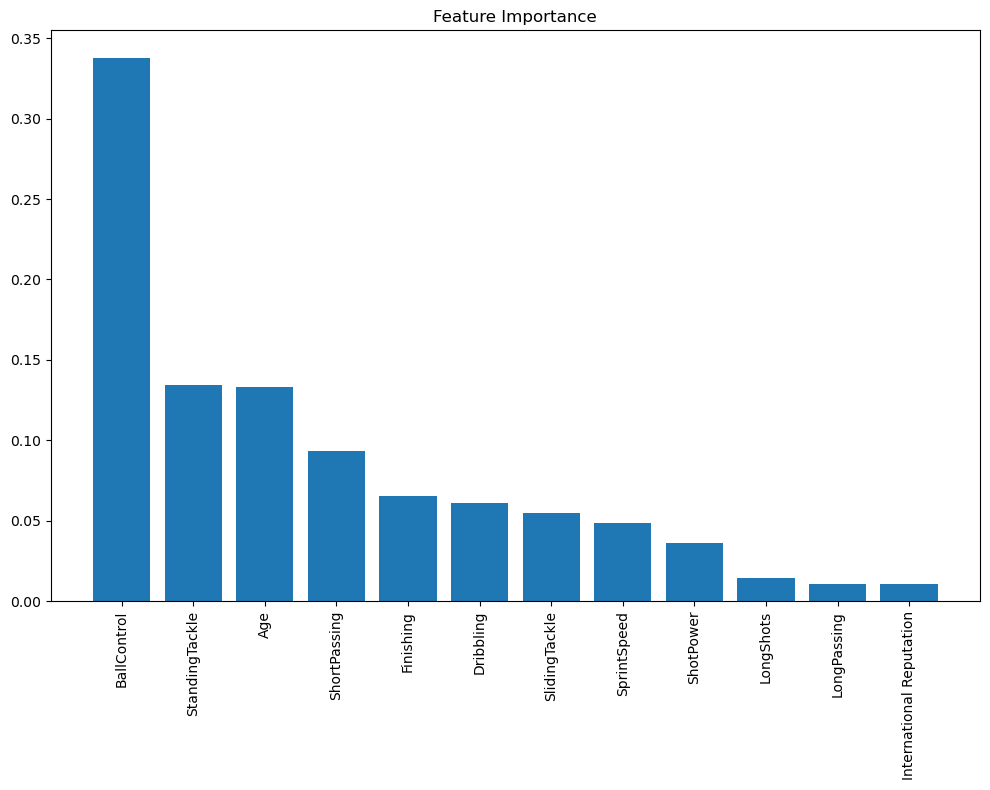

In [40]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_modelgb.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
#plt.savefig('feature_importances.png', transparent=True, bbox_inches='tight')

In [45]:
index_value = 1010
feature_values = new_df_no_outliers.loc[index_value]

for column_name, value in feature_values.iteritems():
    print(f"{column_name}: {value}")


Age: 25.0
SprintSpeed: 68.0
Dribbling: 73.0
StandingTackle: 72.0
SlidingTackle: 70.0
ShortPassing: 73.0
LongPassing: 70.0
ShotPower: 72.0
LongShots: 67.0
International Reputation: 1.0
BallControl: 73.0
Finishing: 53.0
new_values_series: 2700000.0


In [46]:
input_features = [
    {
        'Age': 25.0,
        'SprintSpeed': 68.0,
        'Dribbling': 73.0,
        'StandingTackle': 72.0,
        'SlidingTackle': 70.0,
        'ShortPassing': 73.0,
        'LongPassing': 70.0,
        'ShotPower': 72.0,
        'LongShots': 67.0,
        'International Reputation': 1.0,
        'BallControl': 73.0,
        'Finishing': 53.0
    }
]


In [47]:


input_data = pd.DataFrame(input_features)


input_array = input_data.values

predictions = best_modelgb.predict(input_array)
print(f"predicted market value is {predictions}")



predicted market value is [3038655.25821633]


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [125]:


input_data = pd.DataFrame(input_features)


input_array = input_data.values

predictions = best_modelgb.predict(input_array)
print(f"predicted market value is {predictions}")



predicted market value is [6991644.66297281]


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [48]:
import pandas as pd

# Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Real Market Values': y_test, 'Predicted Market Values': y_pred})
print(results)

       Real Market Values  Predicted Market Values
8726            1400000.0             1.252530e+06
4436            2500000.0             2.329083e+06
4540             775000.0             4.321961e+05
12473           1500000.0             1.245293e+06
8093             325000.0             4.249193e+05
...                   ...                      ...
6931            2100000.0             1.884512e+06
10428           3700000.0             2.944007e+06
8743            4200000.0             3.201406e+06
12029            500000.0             4.022527e+05
11920           1200000.0             8.234921e+05

[3209 rows x 2 columns]


In [126]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = best_modelrf.predict(X_test)

# Evaluate the predictions using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the predictions using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


Mean Squared Error: 3311381626979.213
R^2 Score: 0.7898279039511537


In [127]:
import pandas as pd

# Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Real Market Values': y_test, 'Predicted Market Values': y_pred})
print(results)


       Real Market Values  Predicted Market Values
8726            1400000.0             1.102697e+06
4436            2500000.0             2.122785e+06
4540             775000.0             7.313291e+05
12473           1500000.0             1.214531e+06
8093             325000.0             3.379165e+05
...                   ...                      ...
6931            2100000.0             1.959027e+06
10428           3700000.0             2.905791e+06
8743            4200000.0             3.213429e+06
12029            500000.0             6.926854e+05
11920           1200000.0             7.279268e+05

[3209 rows x 2 columns]


In [128]:
print(results.head(10))  # Print the first 10 rows


       Real Market Values  Predicted Market Values
8726            1400000.0             1.102697e+06
4436            2500000.0             2.122785e+06
4540             775000.0             7.313291e+05
12473           1500000.0             1.214531e+06
8093             325000.0             3.379165e+05
14481            575000.0             6.666763e+05
13801            775000.0             7.073993e+05
6527            1600000.0             1.278305e+06
8871            6500000.0             4.080801e+06
16283           1500000.0             3.103759e+06


In [131]:
from xgboost import XGBRegressor

# Model 11: XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_mse_train = mean_squared_error(y_train, xgb_train_preds)
xgb_mse_test = mean_squared_error(y_test, xgb_test_preds)
xgb_r2_train = r2_score(y_train, xgb_train_preds)
xgb_r2_test = r2_score(y_test, xgb_test_preds)

# Print results for XGBoost Regressor
print("XGBoost Regressor:")
print(f'Training Mean Squared Error: {xgb_mse_train:.4f}')
print(f'Testing Mean Squared Error: {xgb_mse_test:.4f}')
print(f'Training R-squared: {xgb_r2_train:.4f}')
print(f'Testing R-squared: {xgb_r2_test:.4f}\n')


XGBoost Regressor:
Training Mean Squared Error: 422665129889.3040
Testing Mean Squared Error: 3339324971533.0493
Training R-squared: 0.9704
Testing R-squared: 0.7881



In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbors Regressor Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_model = KNeighborsRegressor()
knn_grid_search = GridSearchCV(knn_model, param_grid=knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for K-Nearest Neighbors Regressor
print("K-Nearest Neighbors Regressor - Best Hyperparameters:")
print(knn_grid_search.best_params_)


K-Nearest Neighbors Regressor - Best Hyperparameters:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [29]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost Regressor Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for XGBoost Regressor
print("XGBoost Regressor - Best Hyperparameters:")
print(xgb_grid_search.best_params_)


XGBoost Regressor - Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 1.0}


In [30]:
X = new_df_no_outliers.drop('Transfer Cost', axis=1)
y = new_df_no_outliers['Transfer Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_modelxgb = xgb_grid_search.best_estimator_
# Evaluate the best model
best_model_scorexgb = best_modelxgb.score(X_test, y_test)
print("Best Model Score:", best_model_scorexgb)

Best Model Score: 0.8166190695730902


In [31]:
X = new_df_no_outliers.drop('Transfer Cost', axis=1)
y = new_df_no_outliers['Transfer Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_modelknn = knn_grid_search.best_estimator_
# Evaluate the best model
best_model_scoreknn = best_modelknn.score(X_test, y_test)
print("Best Model Score:", best_model_scoreknn)

Best Model Score: 0.6938849586692566


In [49]:
new_df_no_outliers

,Age,SprintSpeed,Dribbling,StandingTackle,SlidingTackle,ShortPassing,LongPassing,ShotPower,LongShots,International Reputation,BallControl,Finishing,new_values_series
12,35,69.0,65.0,89.0,91.0,82.0,83.0,79.0,64.0,4.0,83.0,65.0,24000000.0
16,28,84.0,77.0,78.0,76.0,82.0,81.0,87.0,83.0,3.0,80.0,63.0,27500000.0
19,33,89.0,90.0,80.0,83.0,81.0,69.0,84.0,80.0,3.0,85.0,70.0,19000000.0
26,34,65.0,76.0,84.0,83.0,81.0,79.0,84.0,81.0,4.0,83.0,75.0,12000000.0
40,35,77.0,84.0,78.0,80.0,83.0,81.0,86.0,78.0,4.0,86.0,61.0,4800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,20,25.0,11.0,12.0,10.0,23.0,17.0,42.0,8.0,1.0,14.0,9.0,375000.0
16705,17,21.0,12.0,11.0,12.0,18.0,19.0,16.0,6.0,1.0,10.0,5.0,100000.0
16706,20,22.0,6.0,13.0,12.0,17.0,28.0,40.0,6.0,1.0,17.0,7.0,180000.0
16707,19,17.0,8.0,11.0,9.0,15.0,14.0,34.0,8.0,1.0,12.0,9.0,100000.0


In [53]:
df.Position


0        <span class="pos pos18">CAM
1        <span class="pos pos11">LDM
2         <span class="pos pos24">RS
3        <span class="pos pos13">RCM
4          <span class="pos pos7">LB
                    ...             
16704    <span class="pos pos29">RES
16705    <span class="pos pos29">RES
16706    <span class="pos pos29">RES
16707    <span class="pos pos29">RES
16708    <span class="pos pos28">SUB
Name: Position, Length: 16366, dtype: object

In [54]:
import pandas as pd

# Assuming you have loaded the model and named it 'best_modelgb'
# and loaded the DataFrame named 'df'
# Remove HTML tags from 'Position' column
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)
# Step 1: Filter DataFrame for a specific 'Position'
position_to_predict = 'ST'
filtered_df = df[df['Position'] == position_to_predict]

# Step 2: Extract input features
input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

# Step 3: Convert input features to array and make predictions
input_array = input_features.values
predictions = best_modelgb.predict(input_array)

# Step 4: Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Real Market Values': filtered_df['Transfer Cost'], 'Predicted Market Values': predictions})

# Step 5: Print the results
print(results)


       Real Market Values  Predicted Market Values
33            119500000.0             1.990198e+07
36             45000000.0             2.280092e+07
39            129500000.0             2.712672e+07
82            194000000.0             3.194057e+07
154            33000000.0             1.823152e+07
...                   ...                      ...
13988            600000.0             6.993191e+05
14011            190000.0             3.065334e+05
14018            750000.0             1.037830e+06
14132            575000.0             4.267315e+05
14509            475000.0             3.882699e+05

[452 rows x 2 columns]


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


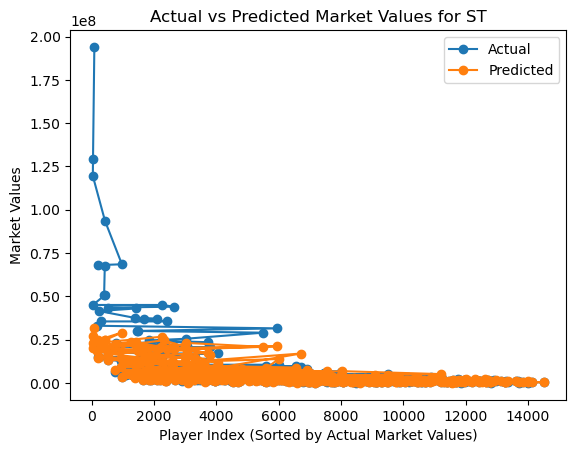

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

 
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

 
position_to_plot = 'ST'

 
filtered_df = df[df['Position'] == position_to_plot]

 
input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

 
input_array = input_features.values
predictions = best_modelgb.predict(input_array)

 
results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})

# Step 7: Sort the DataFrame by actual market values
results.sort_values(by='Actual', inplace=True)

# Step 8: Plot Actual vs Predicted using a line graph
plt.plot(results['Actual'], label='Actual', marker='o')
plt.plot(results['Predicted'], label='Predicted', marker='o')
plt.xlabel('Player Index (Sorted by Actual Market Values)')
plt.ylabel('Market Values')
plt.title(f'Actual vs Predicted Market Values for {position_to_plot}')
plt.legend()
plt.show()


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


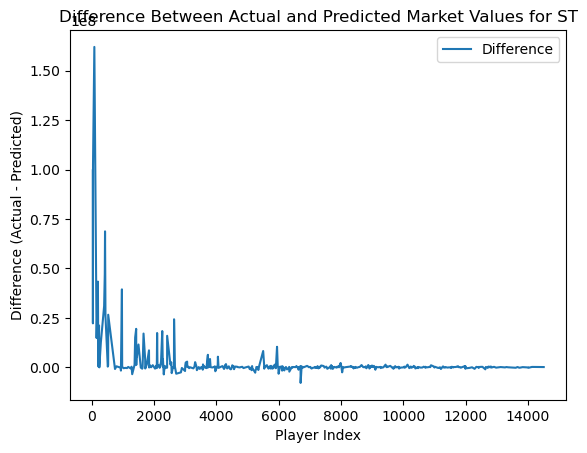

In [58]:
import matplotlib.pyplot as plt
import pandas as pd


df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)


position_to_plot = 'ST'

 
filtered_df = df[df['Position'] == position_to_plot]


input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]


input_array = input_features.values
predictions = best_modelgb.predict(input_array)


results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})


plt.plot(results.index, results['Actual'] - results['Predicted'], label='Difference')
plt.xlabel('Player Index')
plt.ylabel('Difference (Actual - Predicted)')
plt.title(f'Difference Between Actual and Predicted Market Values for {position_to_plot}')
plt.legend()
plt.show()


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


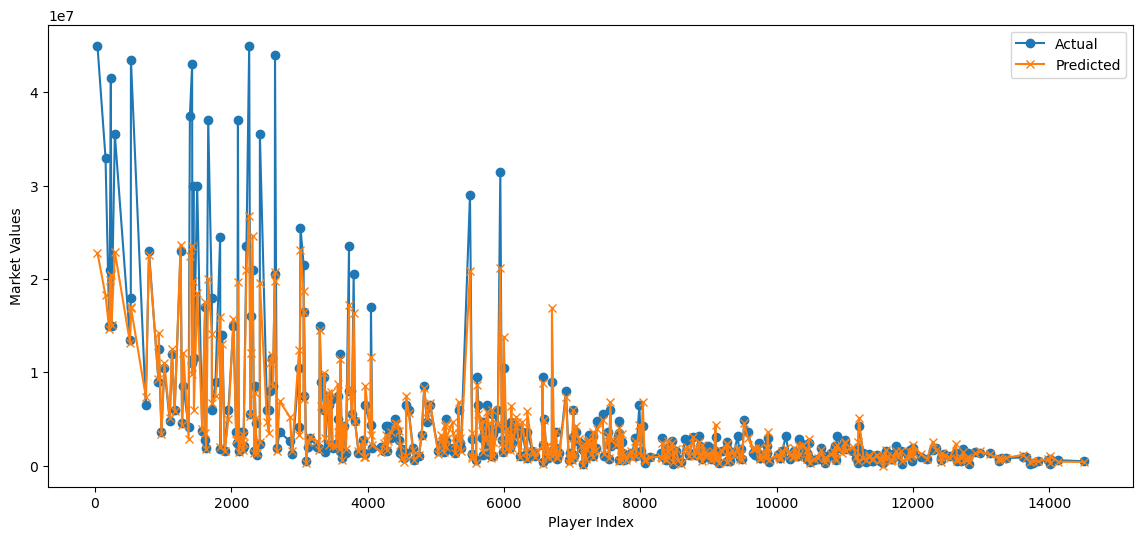

In [79]:
import matplotlib.pyplot as plt
import pandas as pd




df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)


position_to_plot = 'ST'
filtered_df = df[(df['Position'] == position_to_plot) & (df['Transfer Cost'] < 50000000)]

input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

input_array = input_features.values
predictions = best_modelgb.predict(input_array)

results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})


plt.figure(figsize=(14, 6))  # Set the figure size to extend the x-axis length
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x')
plt.xlabel('Player Index')
plt.ylabel('Market Values')

plt.legend()
plt.show()


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


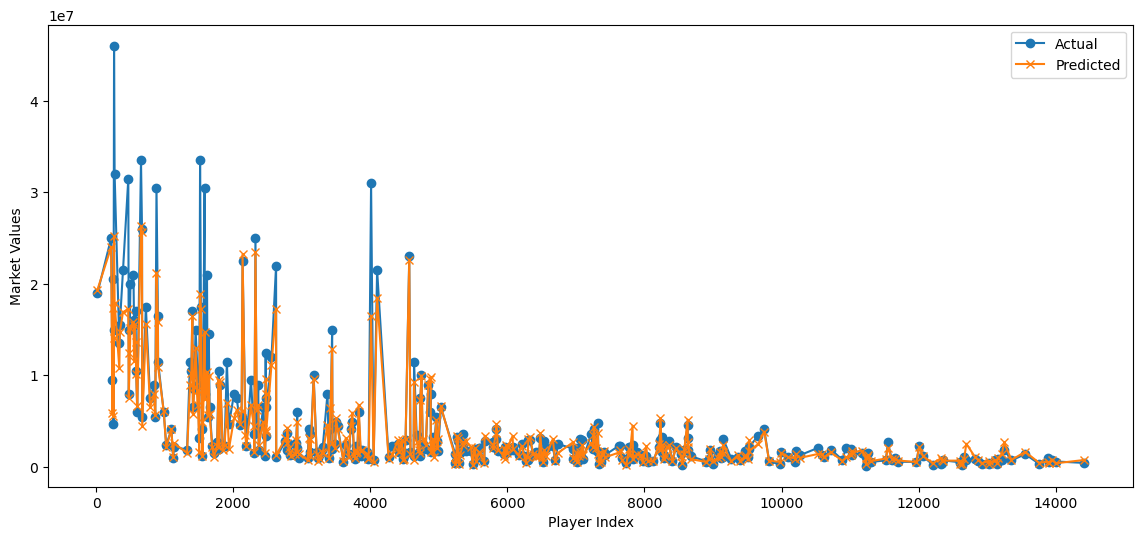

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

 

# Step 1: Choose a specific 'Position'
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Step 2: Filter DataFrame for a specific 'Position' and 'Transfer Cost' less than 500000000
position_to_plot = 'RM'
filtered_df = df[(df['Position'] == position_to_plot) & (df['Transfer Cost'] < 50000000)]

# Step 3: Extract input features
input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

# Step 4: Convert input features to array and make predictions
input_array = input_features.values
predictions = best_modelgb.predict(input_array)

# Step 5: Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})

# Step 6: Plot Actual vs Predicted values on the same graph with increased X axis length
plt.figure(figsize=(14, 6))  # Set the figure size to extend the x-axis length
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x')
plt.xlabel('Player Index')
plt.ylabel('Market Values')
#plt.title(f'Comparison of Actual and Predicted Market Values for {position_to_plot}')
plt.legend()
plt.show()


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


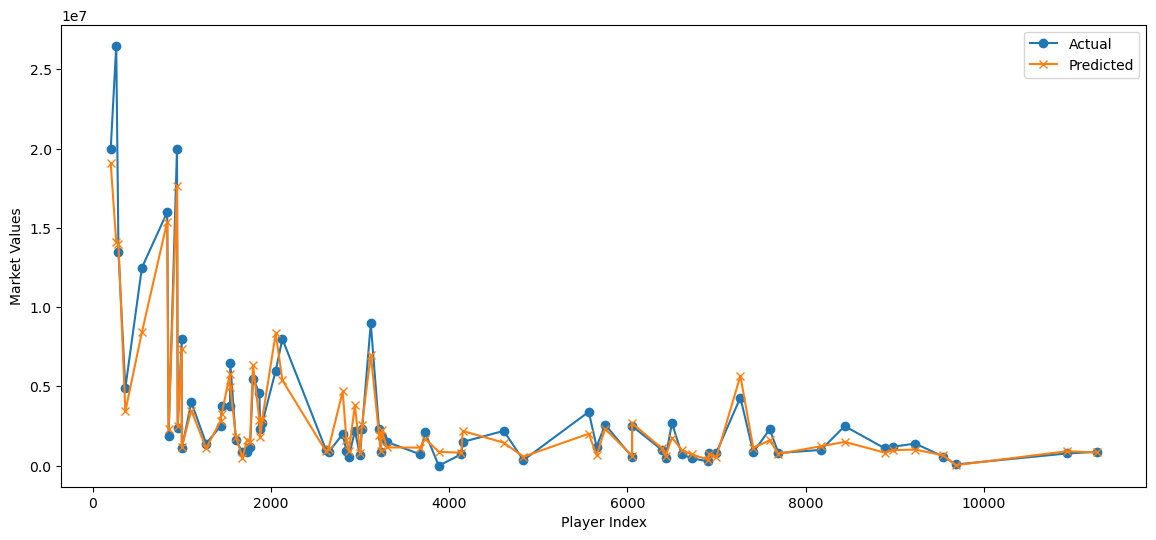

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
 

# Step 1: Choose a specific 'Position'
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Step 2: Filter DataFrame for a specific 'Position' and 'Transfer Cost' less than 500000000
position_to_plot = 'CM'
filtered_df = df[(df['Position'] == position_to_plot) & (df['Transfer Cost'] < 50000000)]

# Step 3: Extract input features
input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

# Step 4: Convert input features to array and make predictions
input_array = input_features.values
predictions = best_modelgb.predict(input_array)

# Step 5: Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})

# Step 6: Plot Actual vs Predicted values on the same graph with increased X axis length
plt.figure(figsize=(14, 6))  # Set the figure size to extend the x-axis length
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x')
plt.xlabel('Player Index')
plt.ylabel('Market Values')
#plt.title(f'Comparison of Actual and Predicted Market Values for {position_to_plot}')
plt.legend()
plt.show()


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


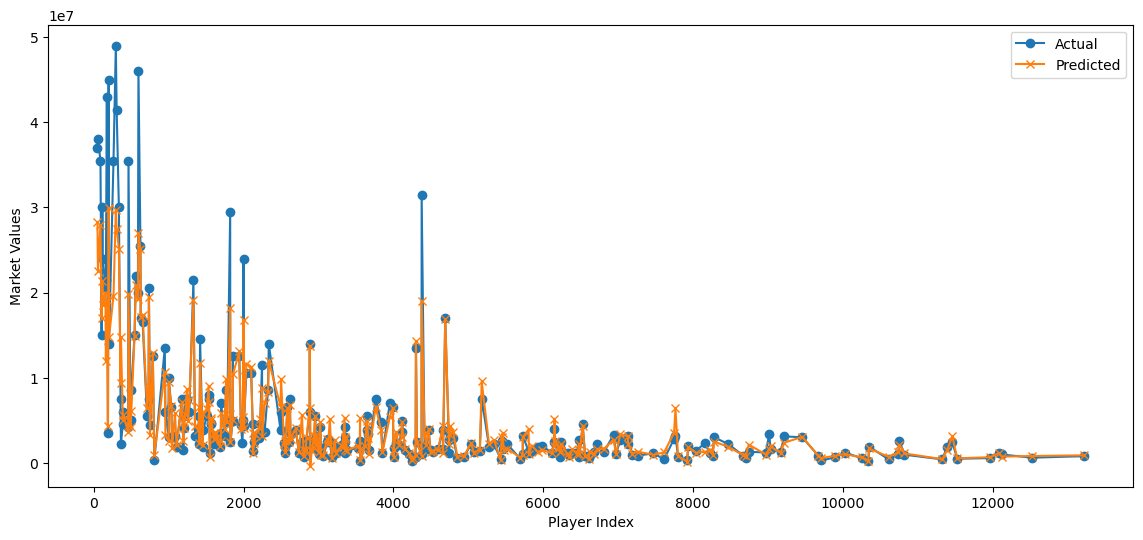

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

 

# Step 1: Choose a specific 'Position'
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Step 2: Filter DataFrame for a specific 'Position' and 'Transfer Cost' less than 500000000
position_to_plot = 'CAM'
filtered_df = df[(df['Position'] == position_to_plot) & (df['Transfer Cost'] < 50000000)]

# Step 3: Extract input features
input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

# Step 4: Convert input features to array and make predictions
input_array = input_features.values
predictions = best_modelgb.predict(input_array)

# Step 5: Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})

# Step 6: Plot Actual vs Predicted values on the same graph with increased X axis length
plt.figure(figsize=(14, 6))  # Set the figure size to extend the x-axis length
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x')
plt.xlabel('Player Index')
plt.ylabel('Market Values')
#plt.title(f'Comparison of Actual and Predicted Market Values for {position_to_plot}')
plt.legend()
plt.show()


c:\Users\abish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


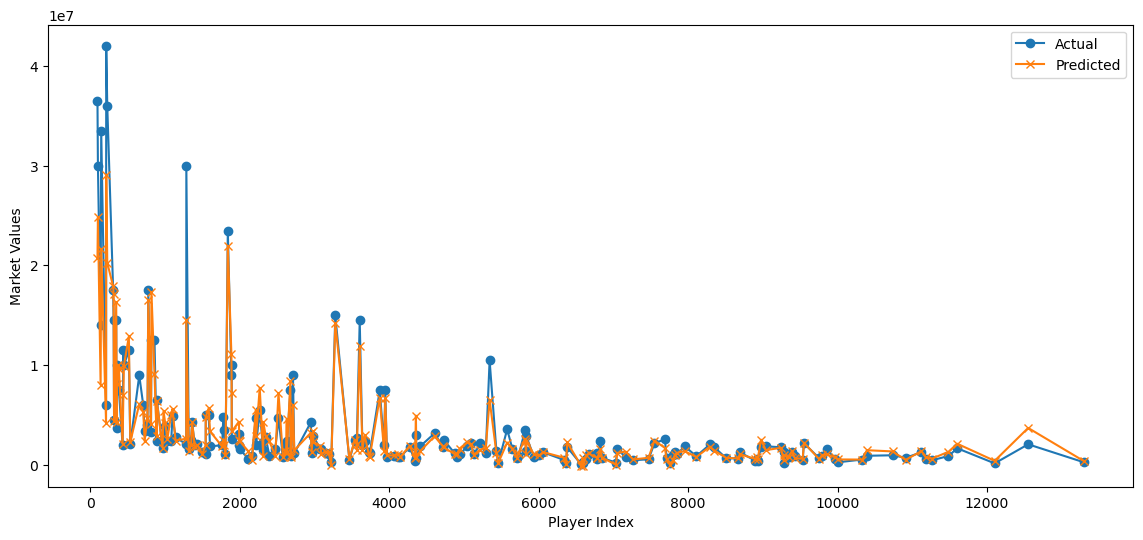

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

 

# Step 1: Choose a specific 'Position'
df['Position'] = df['Position'].str.replace(r'<.*?>', '', regex=True)

# Step 2: Filter DataFrame for a specific 'Position' and 'Transfer Cost' less than 500000000
position_to_plot = 'RDM'
filtered_df = df[(df['Position'] == position_to_plot) & (df['Transfer Cost'] < 50000000)]

# Step 3: Extract input features
input_features = filtered_df[['Age', 'SprintSpeed', 'Dribbling', 'StandingTackle', 'SlidingTackle',
                              'ShortPassing', 'LongPassing', 'ShotPower', 'LongShots',
                              'International Reputation', 'BallControl', 'Finishing']]

# Step 4: Convert input features to array and make predictions
input_array = input_features.values
predictions = best_modelgb.predict(input_array)

# Step 5: Create a DataFrame with real and predicted market values
results = pd.DataFrame({'Actual': filtered_df['Transfer Cost'], 'Predicted': predictions})

# Step 6: Plot Actual vs Predicted values on the same graph with increased X axis length
plt.figure(figsize=(14, 6))  # Set the figure size to extend the x-axis length
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x')
plt.xlabel('Player Index')
plt.ylabel('Market Values')
#plt.title(f'Comparison of Actual and Predicted Market Values for {position_to_plot}')
plt.legend()
plt.show()
